In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "data-penjualan-zara"

# **Import**

In [2]:
library(dplyr)
library(ggplot2)
library(psych)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




# **1. Data Import & Structure**

In [3]:
data <- read.csv('/kaggle/input/data-penjualan-zara/zara.csv', sep = ";", quote = "\"" ,stringsAsFactors = FALSE)

**1. Product ID: Unique identifier for each product.**

**2. Product Position: The position of the product in the catalog or store layout.**

**3. Promotion: Indicator of whether the product is currently on promotion or not.**

**4. Product Category: The category of the product, such as clothing, accessories, shoes, etc.**

**5. Seasonal: Indicator of whether the product is part of a specific seasonal collection.**

**6. Sales Volume: The quantity of products sold.**

**7. Brand: Brand of the product.**

**8. URL: Product URL (e.g., if the product is sold online).**

**9. SKU: Stock Keeping Unit, a unique code used to identify items available for sale.**

**10. Name: Name of the product.**

**11. Description: Description of the product.**

**12. Price: Price of the product.**

**13. Currency: Currency of the product price.**

**14. Scraped_at: The time when the data was scraped (e.g., in web scraping process).**

**15. Terms: Terms or conditions of the product.**

**16. Section: Section or category where the product is sold in the store (e.g., women's clothing, men's clothing, children's clothing, etc.).**

**Check data before preprocessing**

In [4]:
head(data)

,Product.ID,Product.Position,Promotion,Product.Category,Seasonal,Sales.Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket-p06985450.html,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop fabric. High collar and adjustable long sleeves with adhesive straps. Welt pockets at hip. Adjustable hem with side elastics. Front zip closure.,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
2,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p08896675.html,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and long sleeves with buttoned cuffs. Welt pockets at hip and interior pocket. Central back vent at hem. Front button closure.,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
3,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacket-p01564520.html,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sleeves with buttoned cuffs. Welt pocket at chest and flap pockets at hip. Interior pocket. Back vents. Front button closure.,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
4,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket-p01564300.html,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. Notched lapel collar. Long sleeves with buttoned cuffs. Welt pocket at chest and flap pockets at hip. Interior pocket. Back vents. Front button closure.,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
5,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket-p08281477.html,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling with fleece interior. Tabbed lapel collar. Long sleeves. Zip pockets at hip. Front zip closure.,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN
6,117590,End-cap,No,Clothing,No,2968,Zara,https://www.zara.com/us/en/contrasting-collar-jacket-p06987331.html,320298385-807-2,CONTRASTING COLLAR JACKET,Relaxed fit jacket. Contrasting lapel collar and long sleeves with buttoned cuffs. Front pouch pockets. Interior pocket. Washed effect. Front zip closure.,79.90,USD,2024-02-19T08:50:09.140497,jackets,MAN


In [5]:
str(data)

'data.frame':	252 obs. of  16 variables:
 $ Product.ID      : int  185102 188771 180176 112917 192936 117590 189118 182157 141861 137121 ...
 $ Product.Position: chr  "Aisle" "Aisle" "End-cap" "Aisle" ...
 $ Promotion       : chr  "No" "No" "Yes" "Yes" ...
 $ Product.Category: chr  "Clothing" "Clothing" "Clothing" "Clothing" ...
 $ Seasonal        : chr  "No" "No" "Yes" "Yes" ...
 $ Sales.Volume    : int  2823 654 2220 1568 2942 2968 952 2421 1916 656 ...
 $ brand           : chr  "Zara" "Zara" "Zara" "Zara" ...
 $ url             : chr  "https://www.zara.com/us/en/basic-puffer-jacket-p06985450.html" "https://www.zara.com/us/en/tuxedo-jacket-p08896675.html" "https://www.zara.com/us/en/slim-fit-suit-jacket-p01564520.html" "https://www.zara.com/us/en/stretch-suit-jacket-p01564300.html" ...
 $ sku             : chr  "272145190-250-2" "324052738-800-46" "335342680-800-44" "328303236-420-44" ...
 $ name            : chr  "BASIC PUFFER JACKET" "TUXEDO JACKET" "SLIM FIT SUIT JACKET" "STRETCH 

**Missing value Check**

In [6]:
colSums(is.na(data))

Product.ID Product.Position        Promotion Product.Category 
               0                0                0                0 
        Seasonal     Sales.Volume            brand              url 
               0                0                0                0 
             sku             name      description            price 
               0                0                0                0 
        currency       scraped_at            terms          section 
               0                0                0                0

In [7]:
dim(data)

[1] 252  16

In [8]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Product.ID,1,252,1.533705e+05,2.616044e+04,151681.5,1.529992e+05,33372.58470,110075.00,199631,89556.00,0.106701229,-1.233757,1.647953e+03
Product.Position*,2,252,1.888889e+00,8.055804e-01,2.0,1.861386e+00,1.48260,1.00,3,2.00,0.202227062,-1.438354,5.074679e-02
Promotion*,3,252,1.476190e+00,5.004267e-01,1.0,1.470297e+00,0.00000,1.00,2,1.00,0.094779285,-1.998902,3.152392e-02
Product.Category*,4,252,1.000000e+00,0.000000e+00,1.0,1.000000e+00,0.00000,1.00,1,0.00,NaN,NaN,0.000000e+00
Seasonal*,5,252,1.507937e+00,5.009319e-01,2.0,1.509901e+00,0.00000,1.00,2,1.00,-0.031561231,-2.006921,3.155574e-02
Sales.Volume,6,252,1.823702e+03,6.977037e+02,1839.5,1.835500e+03,868.80360,529.00,2989,2460.00,-0.113343829,-1.130416,4.395120e+01
brand*,7,252,1.000000e+00,0.000000e+00,1.0,1.000000e+00,0.00000,1.00,1,0.00,NaN,NaN,0.000000e+00
url*,8,252,1.125198e+02,6.550469e+01,108.5,1.120099e+02,83.76690,1.00,228,227.00,0.052702921,-1.183395,4.126407e+00
sku*,9,252,1.151429e+02,6.590851e+01,115.5,1.152574e+02,83.02560,1.00,228,227.00,-0.014272689,-1.200698,4.151846e+00


**Remove Unnecessary Variables**

In [9]:
data <- data[,-c(8:9,11,14)]
data2 <- data # Data for datavisualization

**Variable Type Transformation**

In [10]:
data$Product.Position <- as.factor(data$Product.Position)
data$Product.Category <- as.factor(data$Product.Category)
data$brand <- as.factor(data$brand)
data$terms <- as.factor(data$terms)
data$section <- as.factor(data$section)
data$name <- as.factor(data$name)
data$currency <- as.factor(data$currency)

**Data Transform**

In [11]:
# Promotion : No - > 0 , Yes -> 1 
data$Promotion <- ifelse(data$Promotion == 'No', 0 ,
                        ifelse(data$Promotion == 'Yes',1,2))

# Seasonal : No - > 0 , Yes -> 1 
data$Seasonal <- ifelse(data$Seasonal == 'No',0,
                       ifelse(data$Seasonal=='Yes',1,2))

# section : MAN - > 0 , WOMEN -> 1 , 
data$section <- ifelse(data$section == 'MAN',0,
                       ifelse(data$section=='WOMEN',1,2))


**Data check after preprocessing**

In [12]:
head(data)

,Product.ID,Product.Position,Promotion,Product.Category,Seasonal,Sales.Volume,brand,name,price,currency,terms,section
,<int>,<fct>,<dbl>,<fct>,<dbl>,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>
1,185102,Aisle,0,Clothing,0,2823,Zara,BASIC PUFFER JACKET,19.99,USD,jackets,0
2,188771,Aisle,0,Clothing,0,654,Zara,TUXEDO JACKET,169.00,USD,jackets,0
3,180176,End-cap,1,Clothing,1,2220,Zara,SLIM FIT SUIT JACKET,129.00,USD,jackets,0
4,112917,Aisle,1,Clothing,1,1568,Zara,STRETCH SUIT JACKET,129.00,USD,jackets,0
5,192936,End-cap,0,Clothing,1,2942,Zara,DOUBLE FACED JACKET,139.00,USD,jackets,0
6,117590,End-cap,0,Clothing,0,2968,Zara,CONTRASTING COLLAR JACKET,79.90,USD,jackets,0


In [13]:
str(data)

'data.frame':	252 obs. of  12 variables:
 $ Product.ID      : int  185102 188771 180176 112917 192936 117590 189118 182157 141861 137121 ...
 $ Product.Position: Factor w/ 3 levels "Aisle","End-cap",..: 1 1 2 1 2 2 3 1 1 1 ...
 $ Promotion       : num  0 0 1 1 0 0 1 0 1 0 ...
 $ Product.Category: Factor w/ 1 level "Clothing": 1 1 1 1 1 1 1 1 1 1 ...
 $ Seasonal        : num  0 0 1 1 1 0 1 0 1 1 ...
 $ Sales.Volume    : int  2823 654 2220 1568 2942 2968 952 2421 1916 656 ...
 $ brand           : Factor w/ 1 level "Zara": 1 1 1 1 1 1 1 1 1 1 ...
 $ name            : Factor w/ 195 levels "","100% FEATHER FILL PUFFER JACKET",..: 22 178 143 148 54 40 63 165 4 2 ...
 $ price           : num  20 169 129 129 139 ...
 $ currency        : Factor w/ 1 level "USD": 1 1 1 1 1 1 1 1 1 1 ...
 $ terms           : Factor w/ 5 levels "jackets","jeans",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ section         : num  0 0 0 0 0 0 0 0 0 0 ...


In [14]:
summary(data)

   Product.ID           Product.Position   Promotion      Product.Category
 Min.   :110075   Aisle         :97      Min.   :0.0000   Clothing:252    
 1st Qu.:131054   End-cap       :86      1st Qu.:0.0000                   
 Median :151682   Front of Store:69      Median :0.0000                   
 Mean   :153370                          Mean   :0.4762                   
 3rd Qu.:175670                          3rd Qu.:1.0000                   
 Max.   :199631                          Max.   :1.0000                   
                                                                          
    Seasonal       Sales.Volume   brand    
 Min.   :0.0000   Min.   : 529   Zara:252  
 1st Qu.:0.0000   1st Qu.:1243             
 Median :1.0000   Median :1840             
 Mean   :0.5079   Mean   :1824             
 3rd Qu.:1.0000   3rd Qu.:2399             
 Max.   :1.0000   Max.   :2989             
                                           
                                name         pri

# **2. Data Visualization**

**Data visualization uses data2 for the convenience of visualization.**

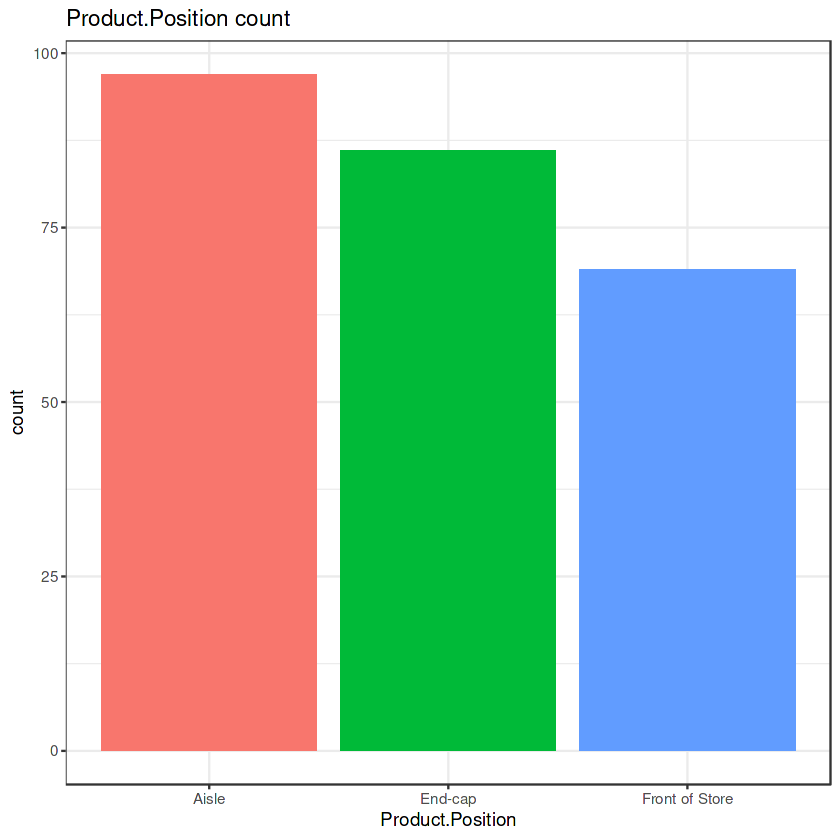

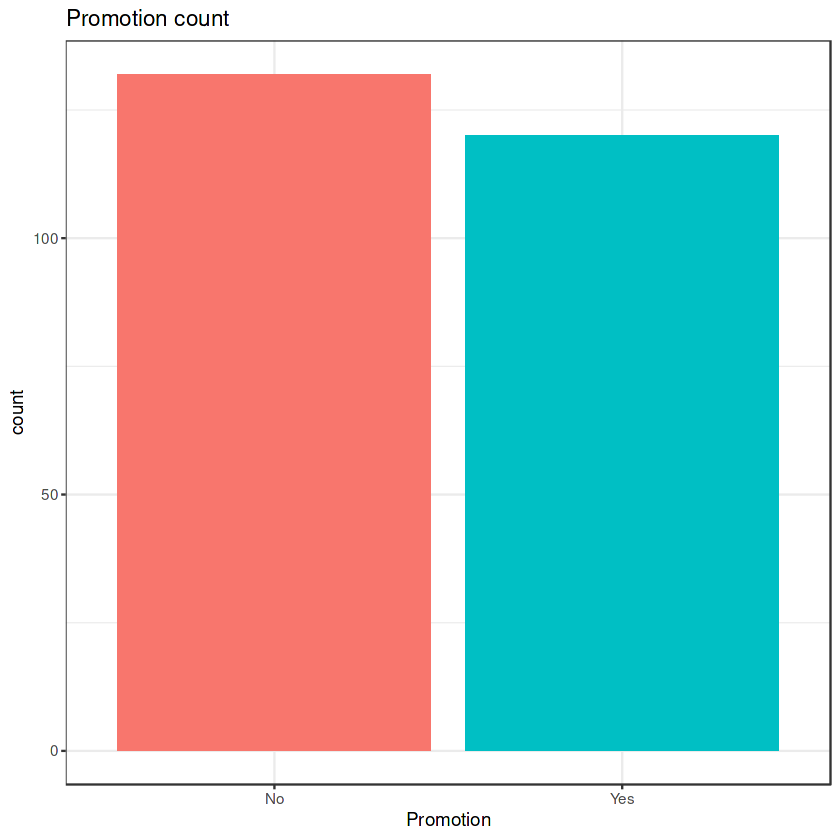

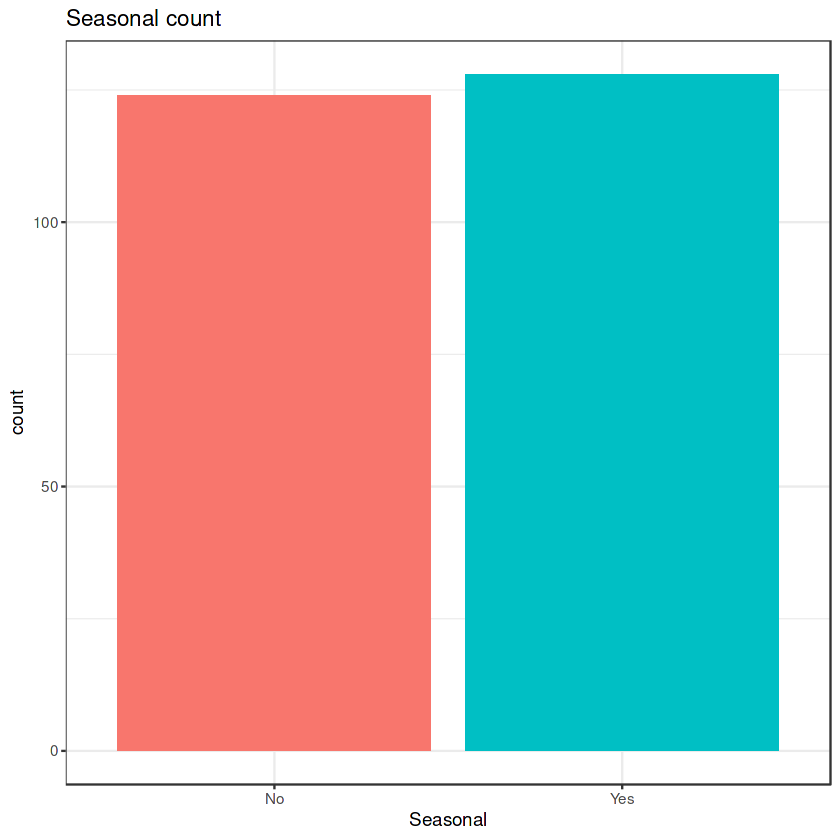

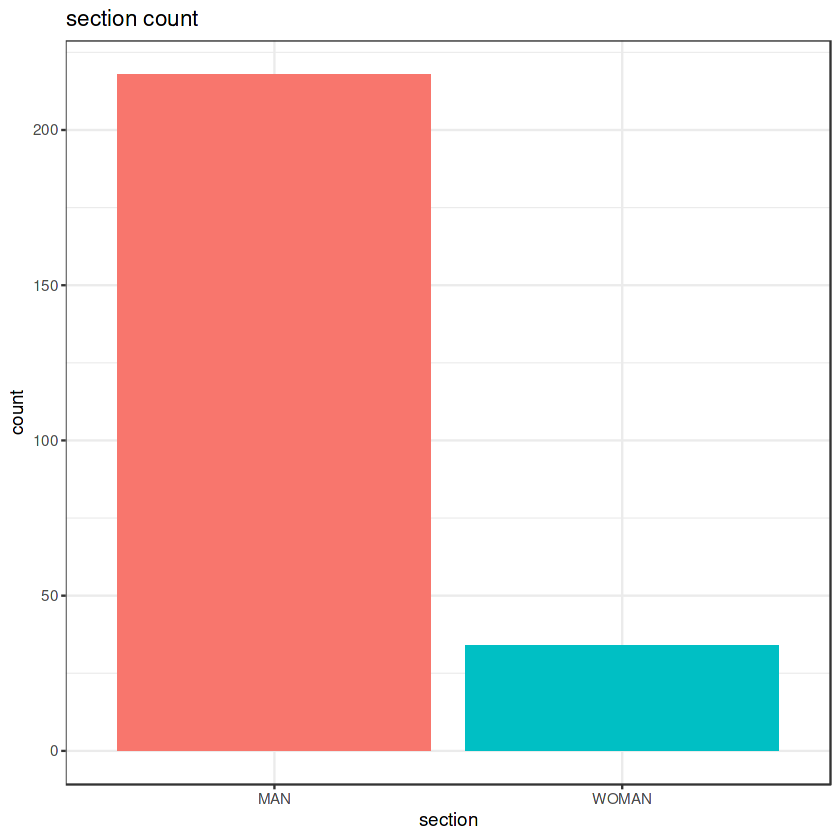

In [15]:
cols = c('Product.Position','Promotion','Seasonal','section')

for (i in cols){
    print(ggplot(data2, aes(x=data2[,i],fill = data2[,i])) + geom_bar() + ggtitle(paste(i,'count'))+ xlab(i) + theme_bw() + theme(legend.position = 'none'))
}

----------------------------------

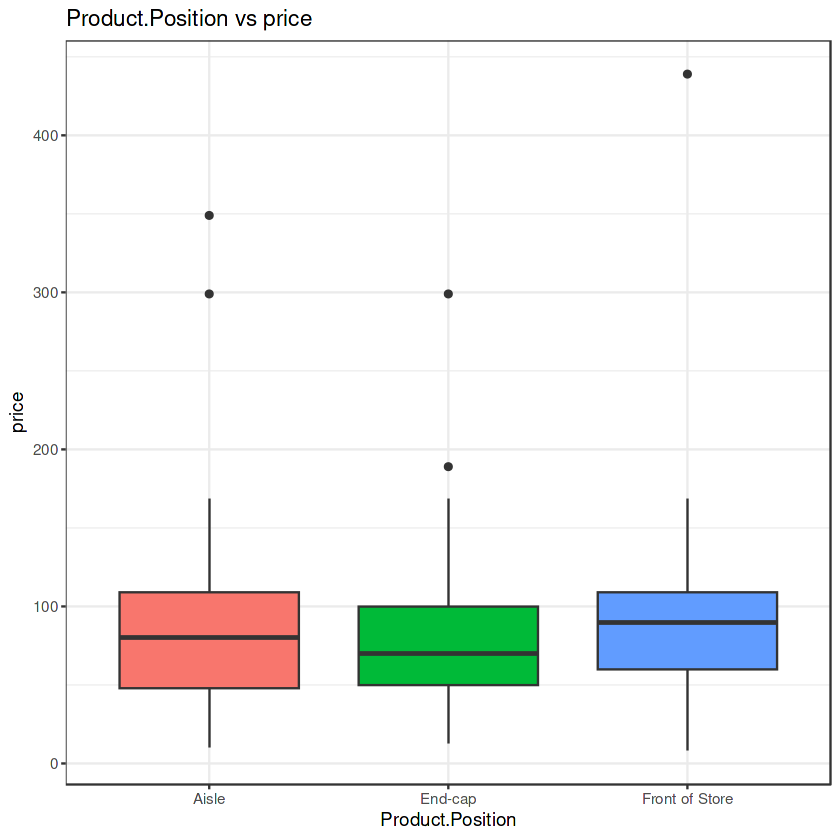

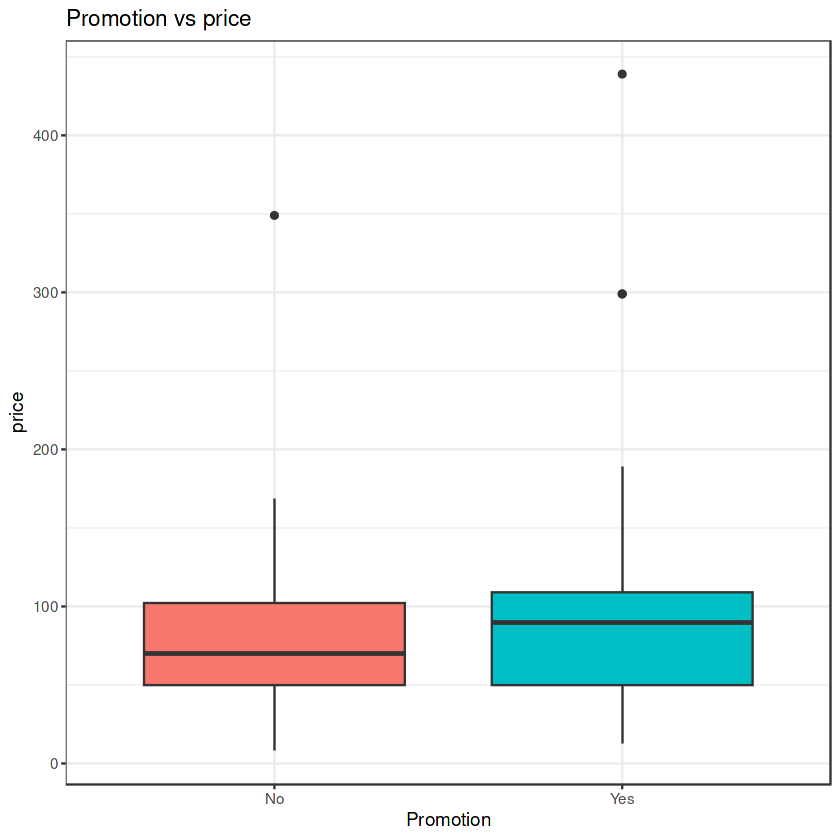

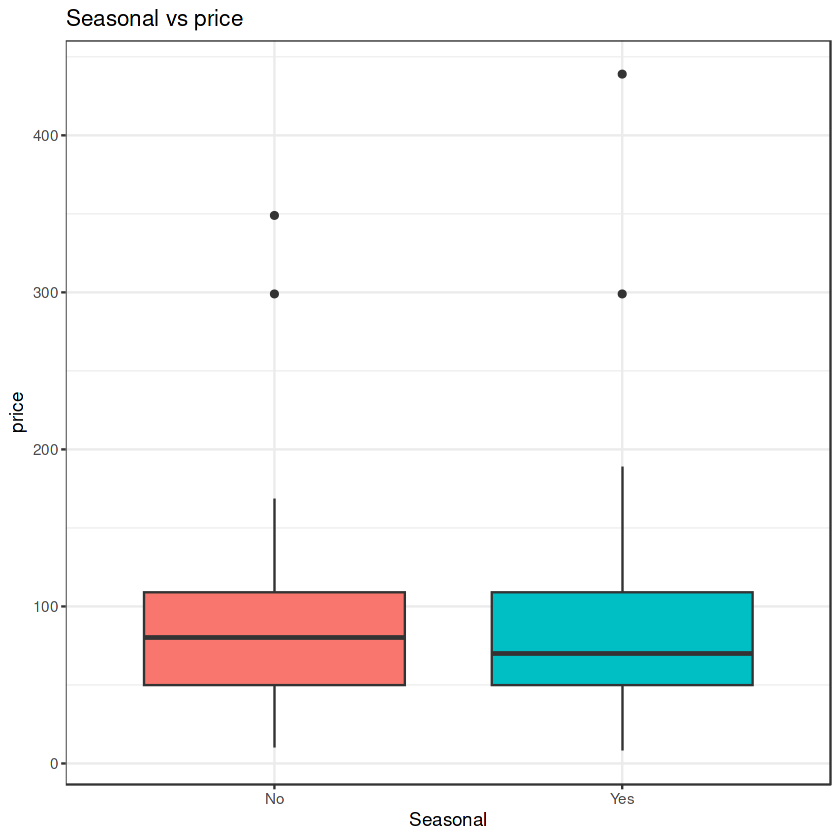

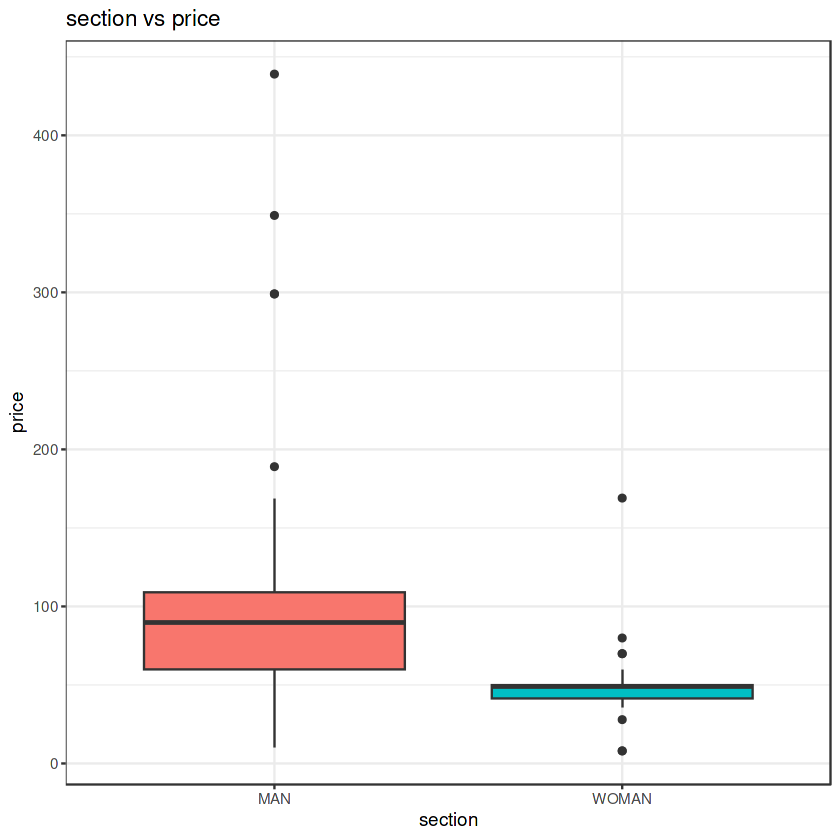

In [16]:
for(i in cols){
    print(ggplot(data2, aes(x=data2[,i], y=price, fill= data2[,i])) + geom_boxplot() + xlab(i) +ggtitle(paste(i,'vs price'))+ theme_bw() + theme(legend.position = 'none') )
}

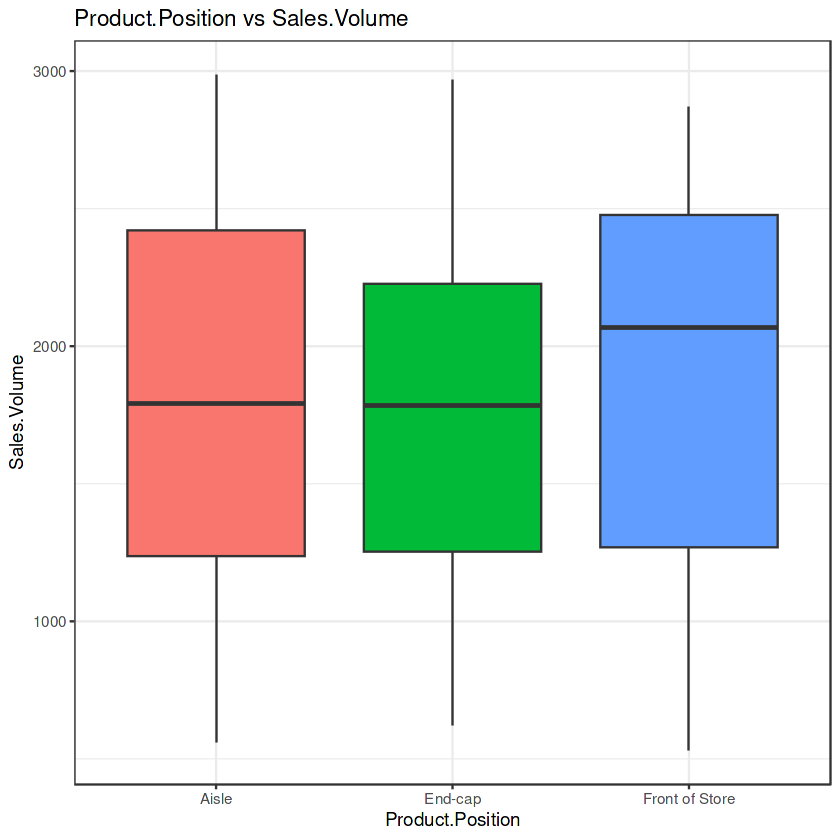

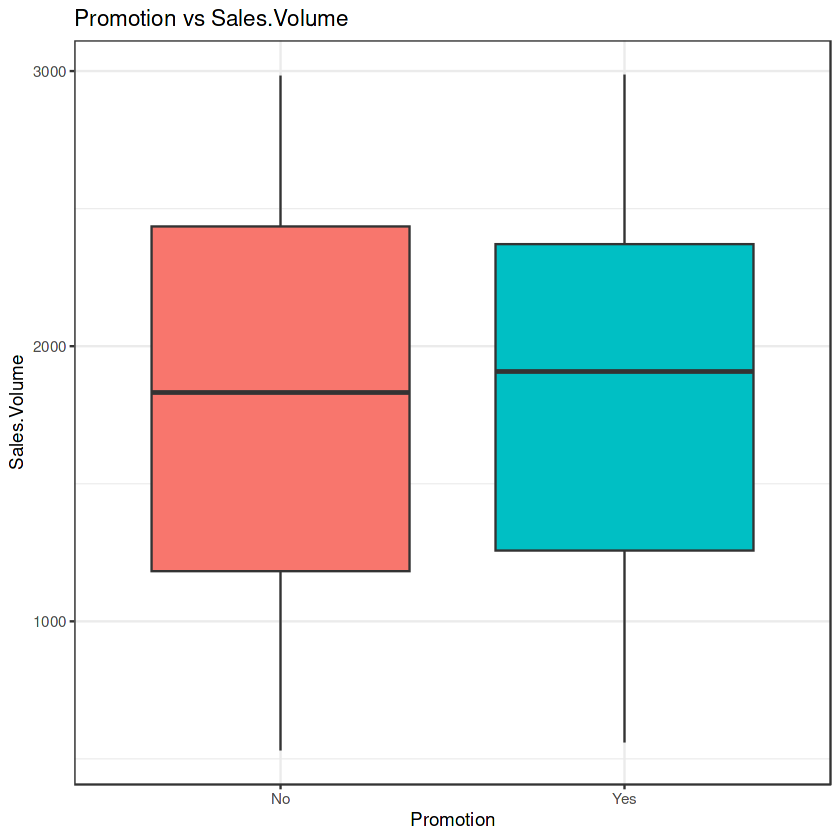

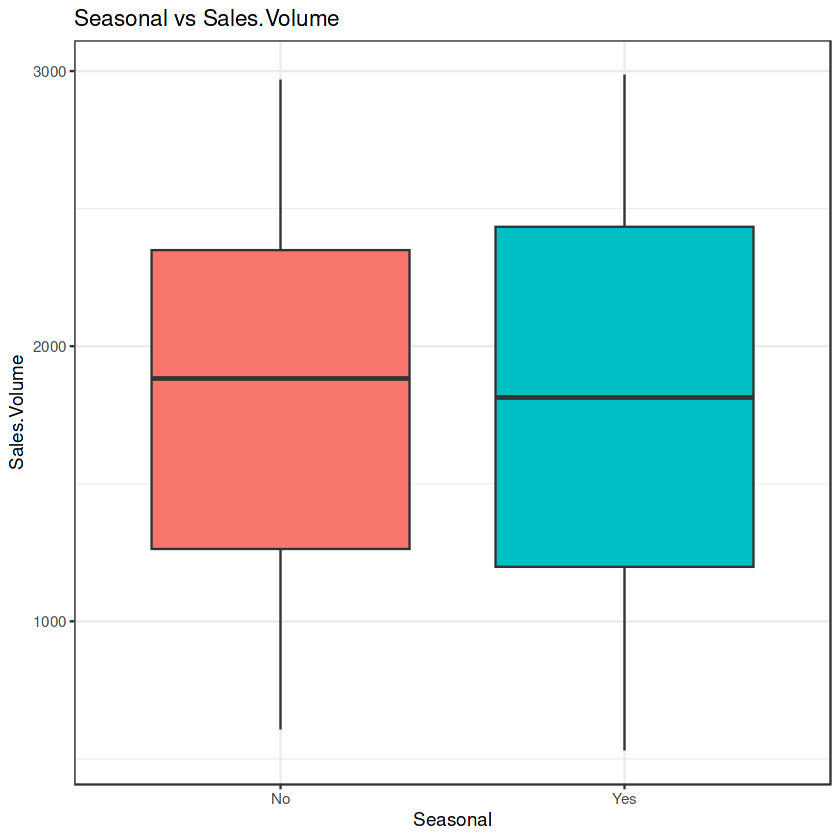

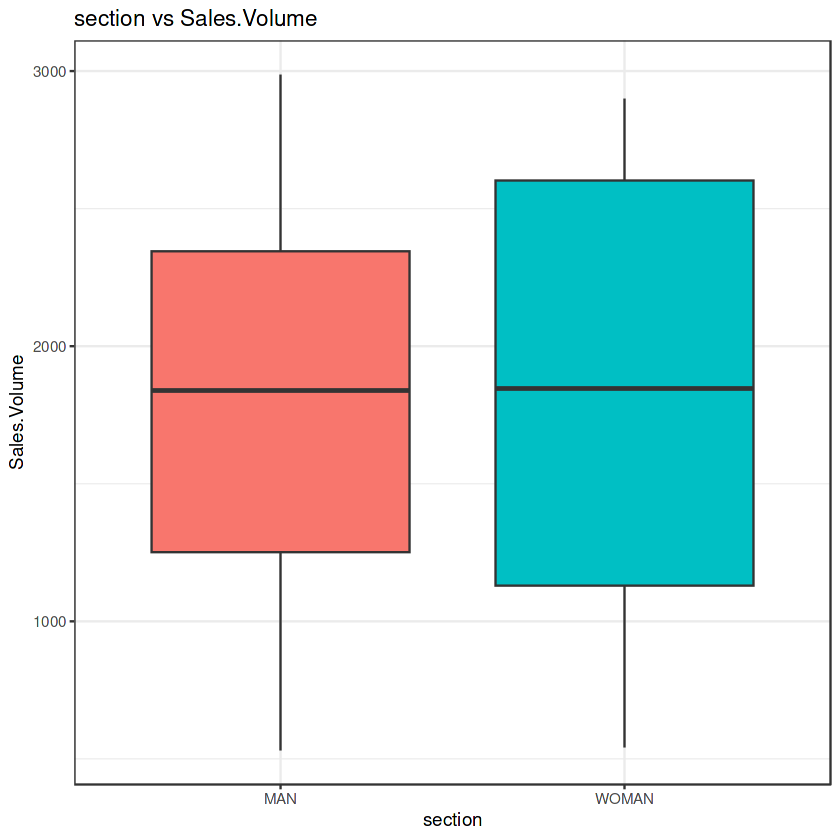

In [17]:
for(i in cols){
    print(ggplot(data2, aes(x=data2[,i], y=Sales.Volume, fill= data2[,i])) + geom_boxplot() + xlab(i) +ggtitle(paste(i,'vs Sales.Volume'))+ theme_bw() + theme(legend.position = 'none') )
}

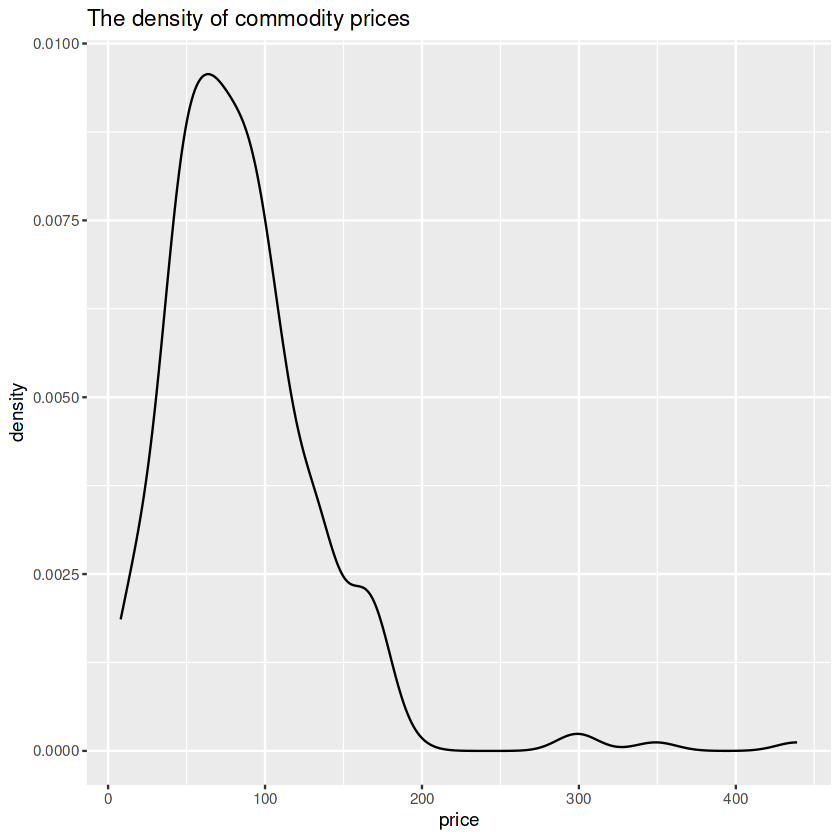

In [18]:
ggplot(data2, aes(x=price)) + geom_density() + ggtitle('The density of commodity prices') + xlab('price')

**There are a lot of products under 100 dollars.**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


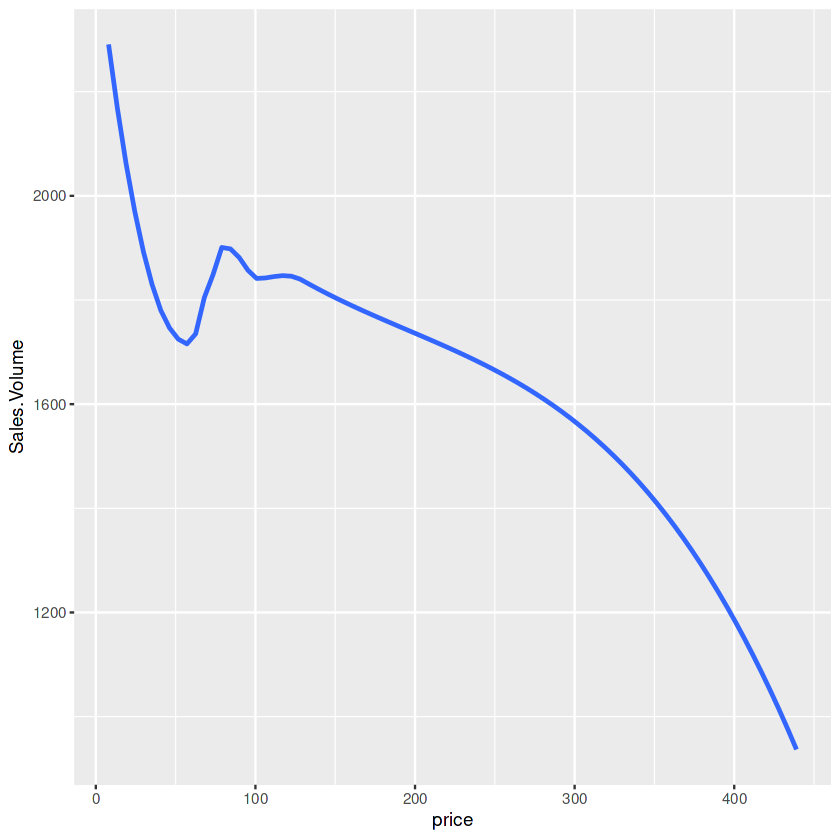

In [19]:
ggplot(data2, aes(x=price, y= Sales.Volume)) + geom_smooth(se=F)

**The relationship between price and sales**

-----------------------------------------

**Average price by group**

In [20]:
data2_promotion <- data2 %>% group_by(Promotion) %>% summarize(N = n(), avg_price = round(mean(price,na.rm=T)))
data2_promotion

Promotion,N,avg_price
<chr>,<int>,<dbl>
No,132,81
Yes,120,92


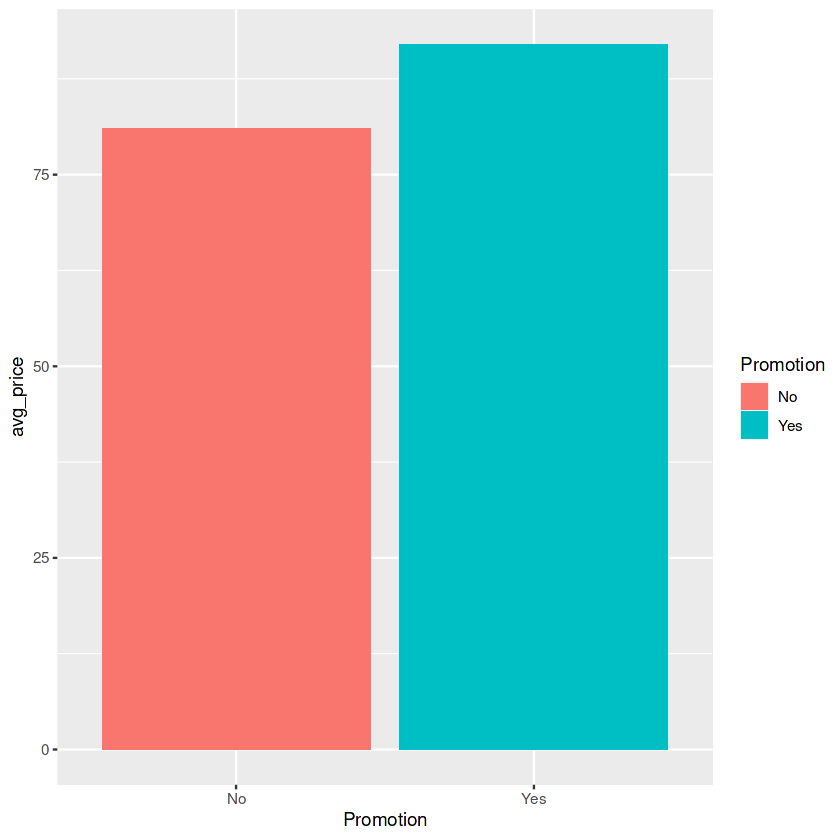

In [21]:
ggplot(data2_promotion, aes(x=Promotion, y= avg_price,fill = Promotion)) + geom_col()

**The average price of products whose promotions are 'Yes' is higher.**

In [22]:
data2_Seasonal <- data2 %>% group_by(Seasonal) %>% summarize(N = n(), avg_price = round(mean(price,na.rm=T)))
data2_Seasonal

Seasonal,N,avg_price
<chr>,<int>,<dbl>
No,124,86
Yes,128,86


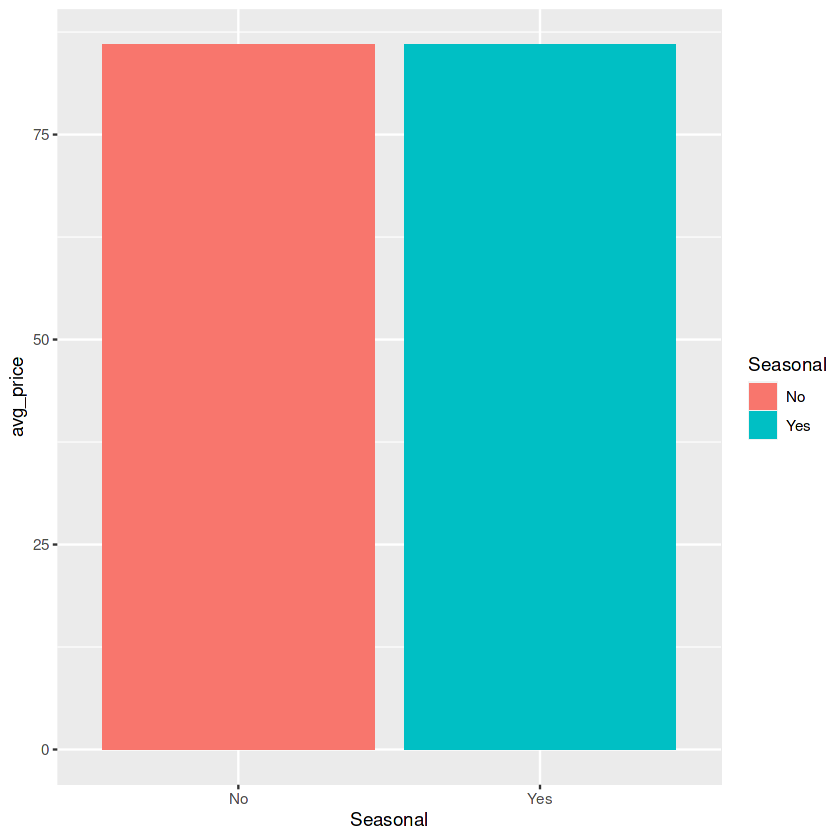

In [23]:
ggplot(data2_Seasonal, aes(x=Seasonal,y=avg_price, fill = Seasonal)) + geom_col()

**There's not much difference in the average price**

In [24]:
# Average calculation according to the number of people allocated
data2_section <- data2 %>% group_by(section) %>%  summarize(N = n(), avg_price = round(mean(price,na.rm=T))) 
data2_section

# If pick 30 people and average them

data2_section30 <- data2 %>% group_by(section) %>% sample_n(size = 30)%>% summarize(N = n(), avg_price = round(mean(price,na.rm=T))) 
data2_section30

section,N,avg_price
<chr>,<int>,<dbl>
MAN,218,92
WOMAN,34,51


section,N,avg_price
<chr>,<int>,<dbl>
MAN,30,102
WOMAN,30,47


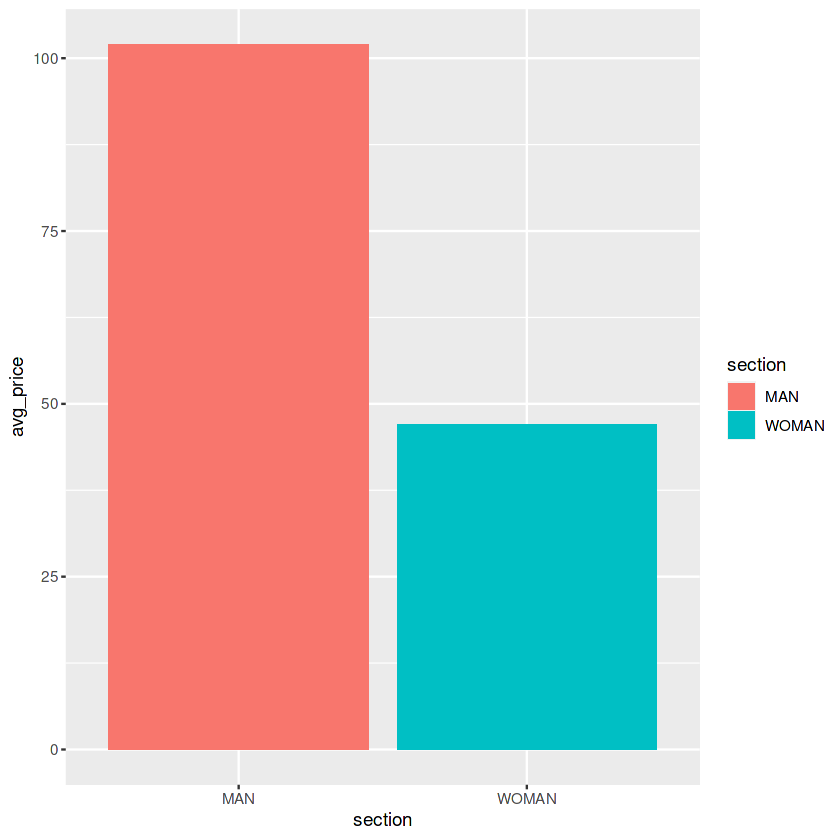

In [25]:
ggplot(data2_section30, aes(x=section,y=avg_price, fill = section)) + geom_col()

**The average price of men product is higher.**

-----------------------------

In [26]:
data2_promotion2 <- data2 %>% group_by(Promotion) %>% summarize(N = n(), avg_Sales.Volume = round(mean(Sales.Volume,na.rm=T)))
data2_promotion2

Promotion,N,avg_Sales.Volume
<chr>,<int>,<dbl>
No,132,1821
Yes,120,1827


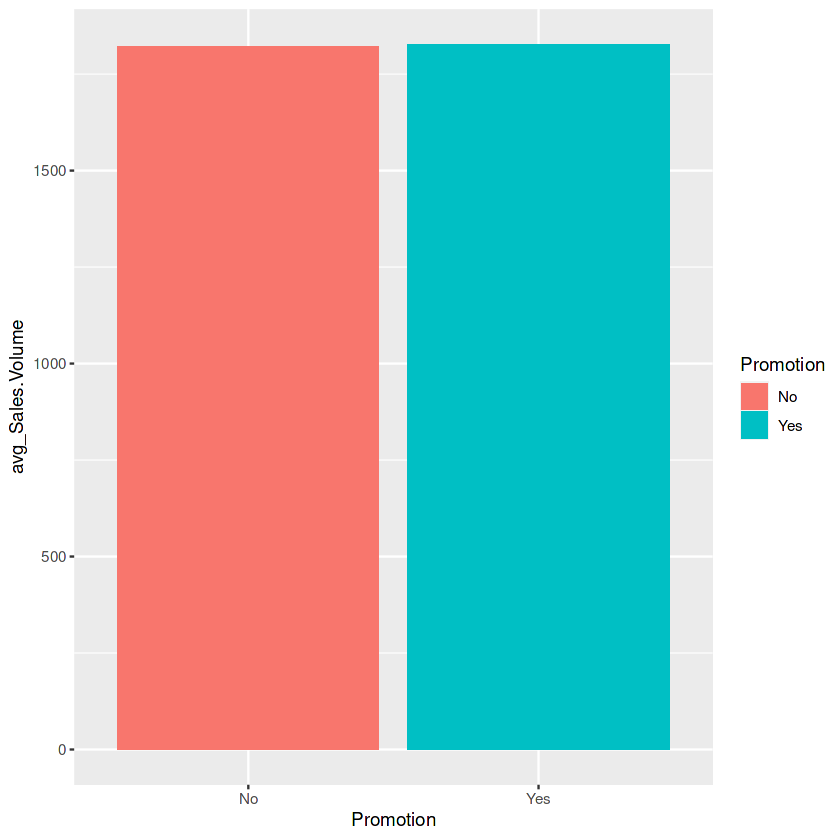

In [27]:
ggplot(data2_promotion2,aes(x=Promotion, y= avg_Sales.Volume,fill = Promotion)) + geom_col()

**There is not much difference in the average sales volume**

In [28]:
data2_Seasonal2 <- data2 %>% group_by(Seasonal) %>% summarize(N = n(), avg_Sales.Volume = round(mean(Sales.Volume,na.rm=T)))
data2_Seasonal2

Seasonal,N,avg_Sales.Volume
<chr>,<int>,<dbl>
No,124,1826
Yes,128,1822


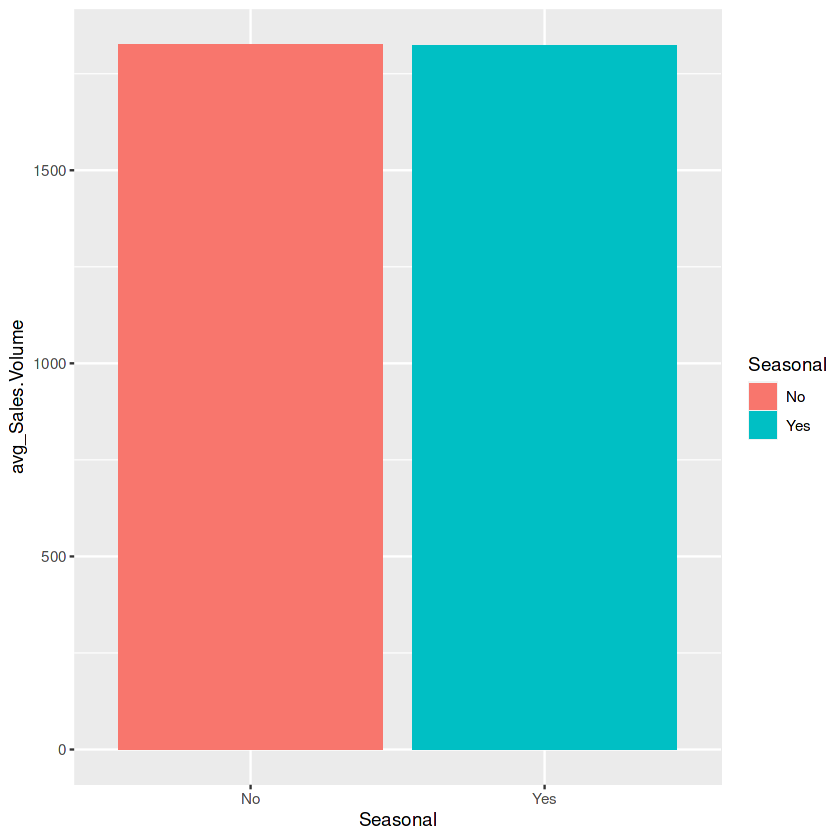

In [29]:
ggplot(data2_Seasonal2, aes(x=Seasonal,y=avg_Sales.Volume, fill = Seasonal)) + geom_col()

**There is not much difference in the average sales volume**

In [30]:
# Average calculation according to the number of people allocated
data2_section2 <- data2 %>% group_by(section) %>%  summarize(N = n(), avg_Sales.Volume = round(mean(Sales.Volume,na.rm=T))) 
data2_section2

section,N,avg_Sales.Volume
<chr>,<int>,<dbl>
MAN,218,1817
WOMAN,34,1864


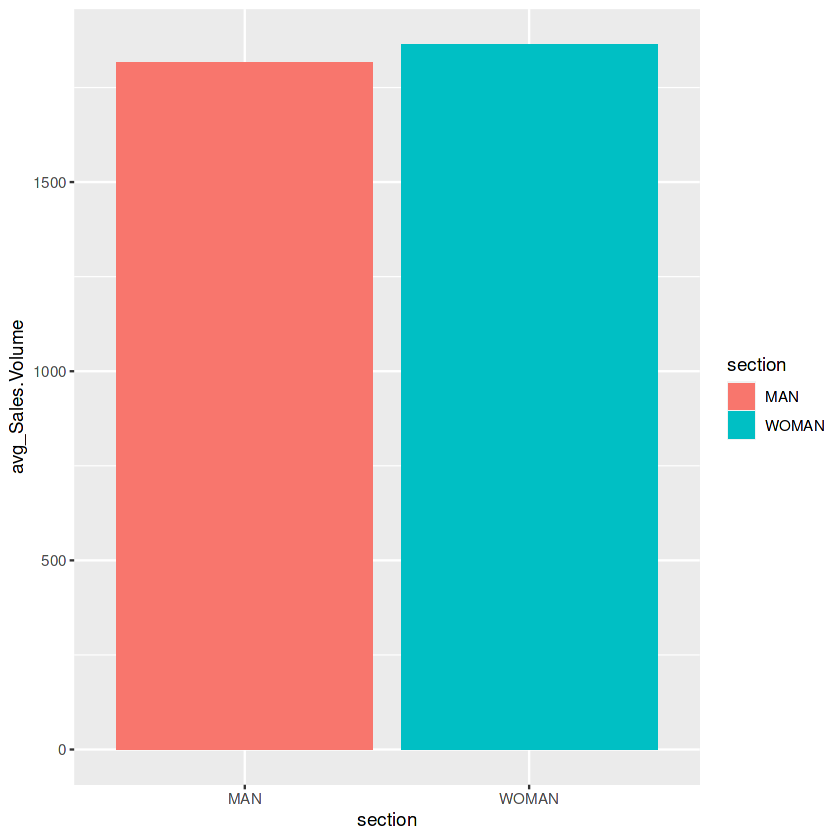

In [31]:
ggplot(data2_section2, aes(x=section,y=avg_Sales.Volume, fill = section)) + geom_col()

**The average sales volume for men and women is similar. But, it shows that women buy more because the number of women is small.**

----------------------------

# **3. Price & Sales.Volume prediction.**

In [32]:
library(psych)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



**Modeling**

**LinearRegression**

In [33]:
md_lr <- lm(price ~Promotion + Seasonal+ section + Sales.Volume ,data=data)

In [34]:
summary(md_lr)


Call:
lm(formula = price ~ Promotion + Seasonal + section + Sales.Volume, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-84.64 -28.77  -5.37  17.67 333.92 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   93.542277   9.879440   9.468   <2e-16 ***
Promotion     12.331567   6.309221   1.955   0.0518 .  
Seasonal       2.779143   6.340179   0.438   0.6615    
section      -20.928691   4.640951  -4.510    1e-05 ***
Sales.Volume  -0.004895   0.004526  -1.081   0.2805    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.01 on 247 degrees of freedom
Multiple R-squared:  0.09266,	Adjusted R-squared:  0.07796 
F-statistic: 6.306 on 4 and 247 DF,  p-value: 7.58e-05


In [35]:
step(md_lr,direction = "backward")

Start:  AIC=1976.73
price ~ Promotion + Seasonal + section + Sales.Volume

               Df Sum of Sq    RSS    AIC
- Seasonal      1       481 618270 1974.9
- Sales.Volume  1      2925 620715 1975.9
<none>                      617789 1976.7
- Promotion     1      9555 627344 1978.6
- section       1     50864 668654 1994.7

Step:  AIC=1974.92
price ~ Promotion + section + Sales.Volume

               Df Sum of Sq    RSS    AIC
- Sales.Volume  1      2938 621208 1974.1
<none>                      618270 1974.9
- Promotion     1      9549 627819 1976.8
- section       1     50392 668662 1992.7

Step:  AIC=1974.12
price ~ Promotion + section

            Df Sum of Sq    RSS    AIC
<none>                   621208 1974.1
- Promotion  1      9504 630712 1975.9
- section    1     50973 672182 1992.0



Call:
lm(formula = price ~ Promotion + section, data = data)

Coefficients:
(Intercept)    Promotion      section  
      86.01        12.30       -20.82  


**Select variable**

In [36]:
md_lr <- lm(price ~ Promotion + section , data = data)

In [37]:
summary(md_lr)


Call:
lm(formula = price ~ Promotion + section, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-85.32 -28.34  -6.78  16.16 340.69 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   86.014      4.506  19.087  < 2e-16 ***
Promotion     12.298      6.301   1.952   0.0521 .  
section      -20.819      4.606  -4.520 9.56e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.95 on 249 degrees of freedom
Multiple R-squared:  0.08764,	Adjusted R-squared:  0.08031 
F-statistic: 11.96 on 2 and 249 DF,  p-value: 1.099e-05


**Regression equation: 86.014 + Promotion * 12.298 + section * -20.819**

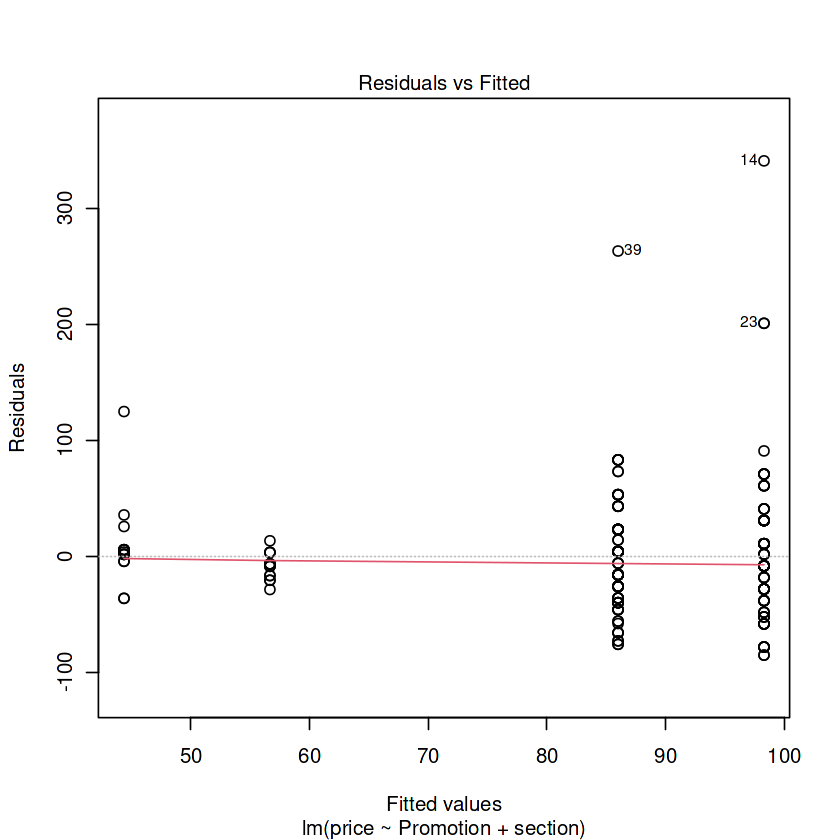

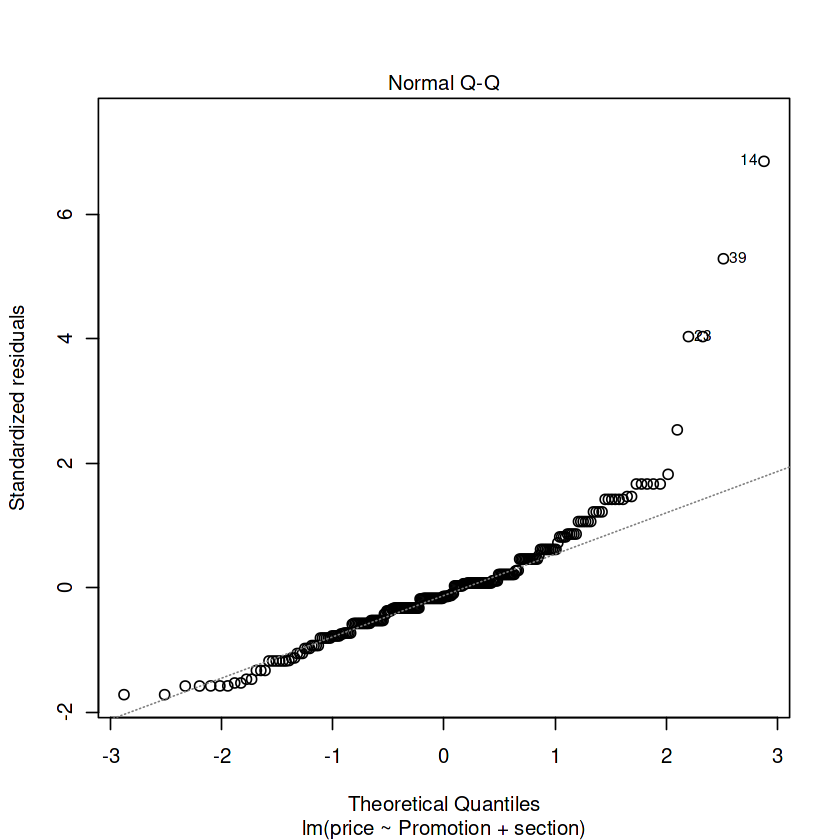

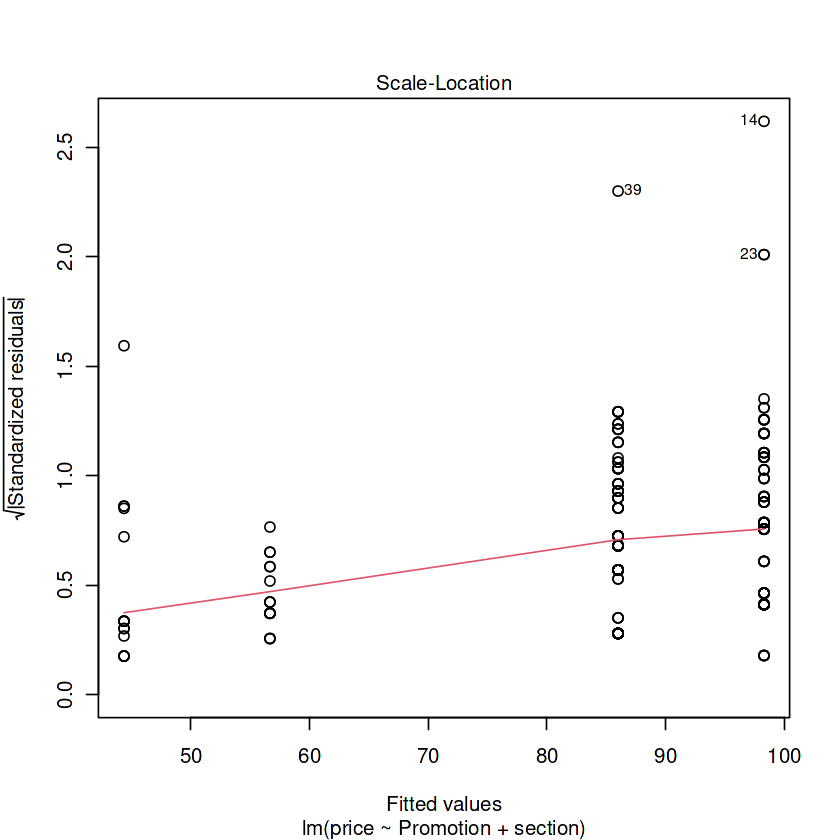

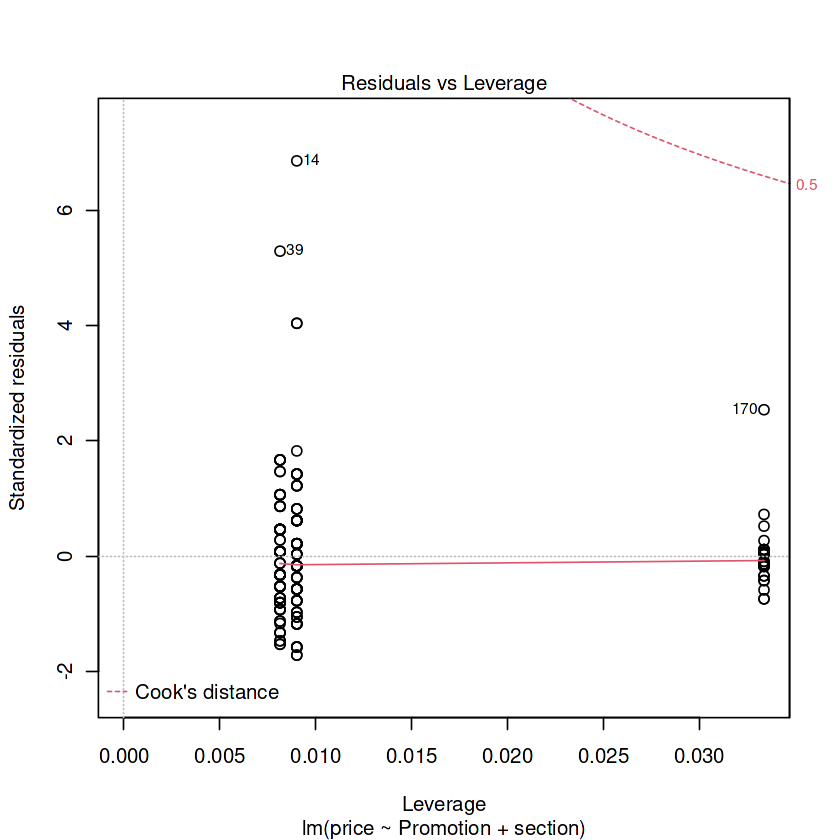

In [38]:
plot(md_lr)

In [39]:
pred <- 86.014 + data$Promotion * 12.298 + data$section * -20.819

In [40]:
accuracy(data$price,pred)

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.0001746032,49.64989,32.74035,-0.1927524,37.47007


------------------------------------------

In [41]:
md_lr2 <- lm(Sales.Volume ~  price + Promotion + Seasonal+ section  ,data=data)

In [42]:
summary(md_lr2)


Call:
lm(formula = Sales.Volume ~ price + Promotion + Seasonal + section, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1352.24  -587.60    21.54   557.96  1202.32 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1899.7760   107.5139  17.670   <2e-16 ***
price         -0.9629     0.8904  -1.081    0.281    
Promotion     17.8684    89.1685   0.200    0.841    
Seasonal      -4.8806    88.9623  -0.055    0.956    
section        3.5204    67.7210   0.052    0.959    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 701.5 on 247 degrees of freedom
Multiple R-squared:  0.005279,	Adjusted R-squared:  -0.01083 
F-statistic: 0.3277 on 4 and 247 DF,  p-value: 0.8592


**The regression model that predicts Sales.Volume is not statistically significant.**

----------------------------------